In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
data = pd.read_excel('data-corona.xlsx')
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse de la forme 

In [4]:
df= data.copy()
df.shape


(5644, 111)

**Types de variables **

In [5]:
df.dtypes
df.dtypes.value_counts()


float64    70
object     37
int64       4
dtype: int64

<AxesSubplot:ylabel='None'>

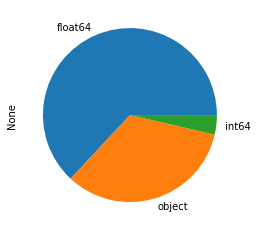

In [6]:
df.dtypes.value_counts().plot.pie()


## Analyses des valeurs manquantes 

In [7]:
df.isna()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5640,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5641,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5642,False,False,False,False,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

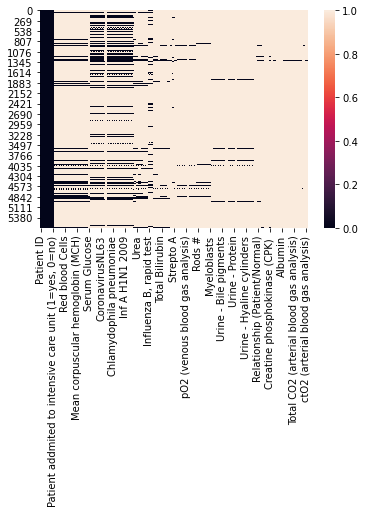

In [8]:
sns.heatmap(df.isna())

<AxesSubplot:>

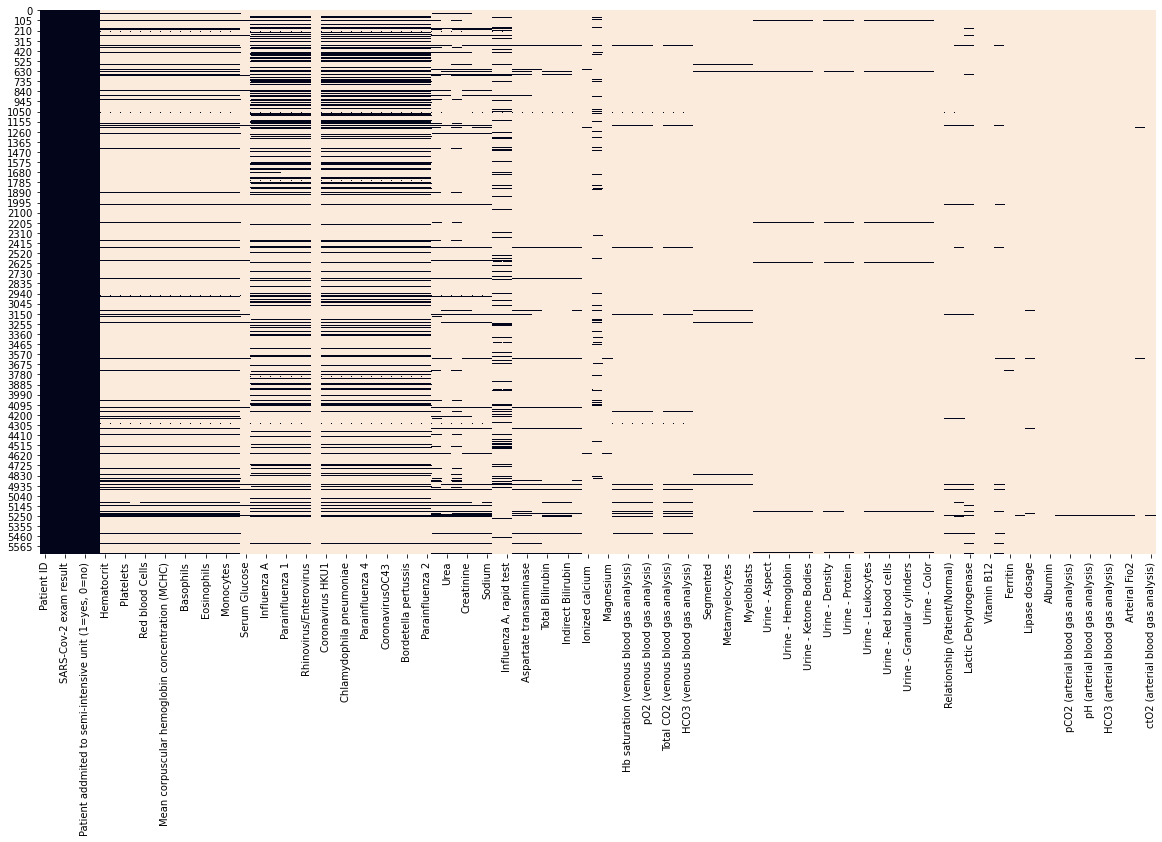

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar= False)


In [10]:

df.isna().sum()/df.shape[0]

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
                                                           ...   
HCO3 (arterial blood gas analysis)                       0.995216
pO2 (arterial blood gas analysis)                        0.995216
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
ctO2 (arterial blood gas analysis)                       0.995216
Length: 111, dtype: float64

pour afficher les pourcentages des valeurs manquantes en ordre décroissant

In [11]:

pd.set_option('display.max_row',111)
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydoph

# Analyse de fond

In [12]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]]
df.head()


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


In [13]:
df.shape


(5644, 39)

<AxesSubplot:>

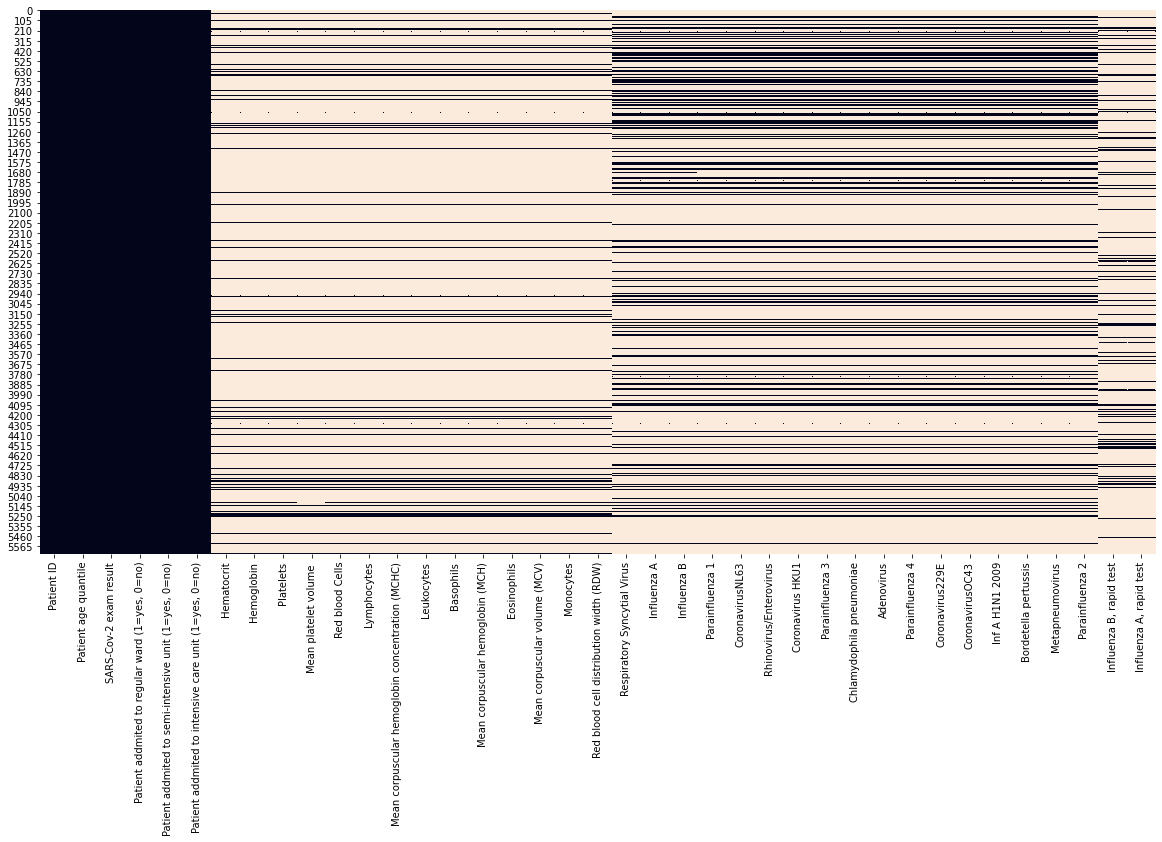

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar= False)


In [15]:
df= df.drop('Patient ID', axis=1)
df.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,negative,negative
2,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN


examen de la colonne target

In [16]:
df['SARS-Cov-2 exam result'].value_counts()


negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

In [17]:
df['SARS-Cov-2 exam result'].value_counts(normalize= True)

negative    0.901134
positive    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

L'Analyse des variables: Histograme des variables continues 

C:\Users\Saloua\Videos\Anaconda\Nouveau dossier\Nouveau dossier\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saloua\Videos\Anaconda\Nouveau dossier\Nouveau dossier\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saloua\Videos\Anaconda\Nouveau dossier\Nouveau dossier\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please 

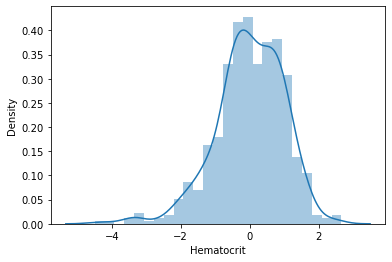

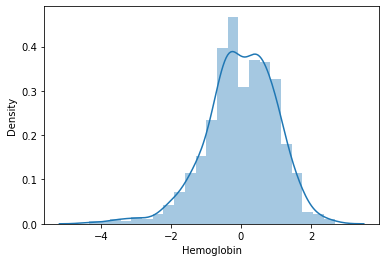

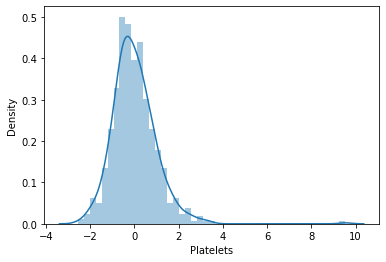

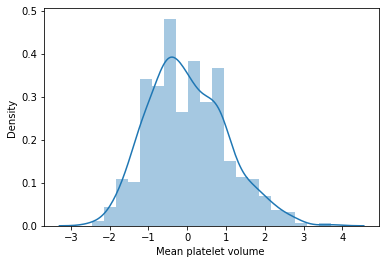

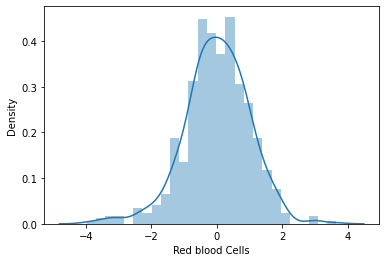

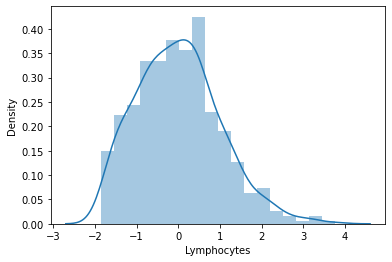

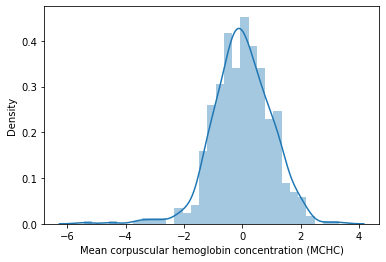

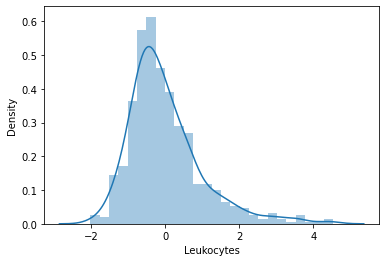

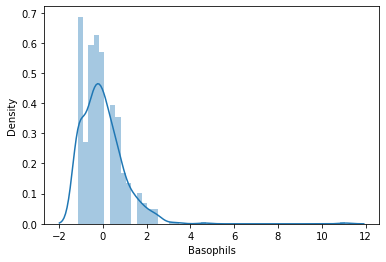

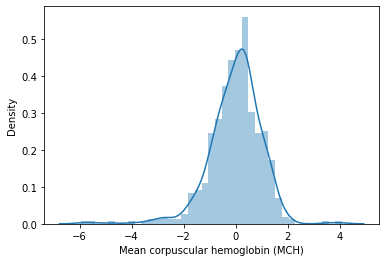

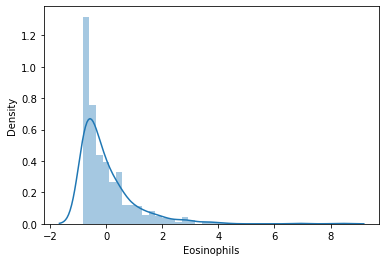

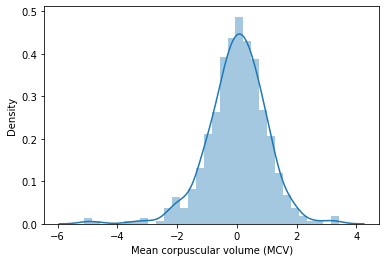

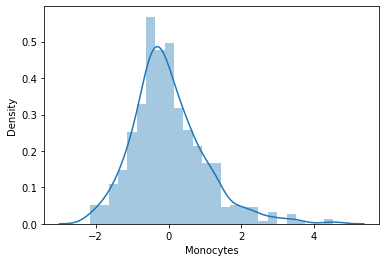

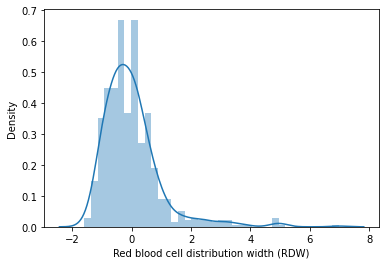

In [18]:
for colo in df.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[colo])

C:\Users\Saloua\Videos\Anaconda\Nouveau dossier\Nouveau dossier\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

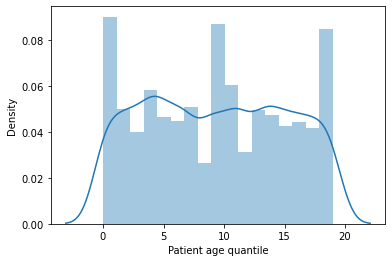

In [19]:
sns.distplot(df['Patient age quantile'])

variable Qualitatives

In [20]:
df['SARS-Cov-2 exam result'].unique()


array(['negative', 'positive'], dtype=object)

In [21]:
for colo in df.select_dtypes('object'):
 print(f'{colo :-<50} {df[colo].unique()} ')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive'] 
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected'] 
Influenza A--------------------------------------- [nan 'not_detected' 'detected'] 
Influenza B--------------------------------------- [nan 'not_detected' 'detected'] 
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected'] 
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected'] 
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected'] 
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected'] 
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected'] 
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected'] 
Adenovirus---------------------------------------- [nan 'not_detected' 'detected'] 
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected'] 


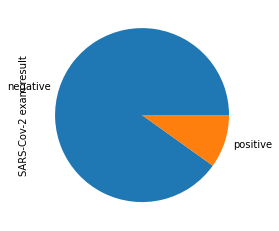

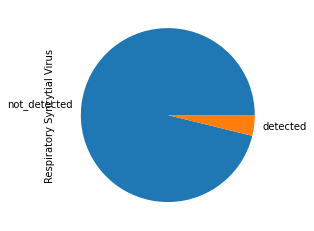

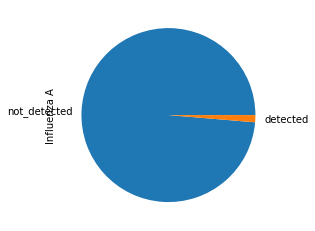

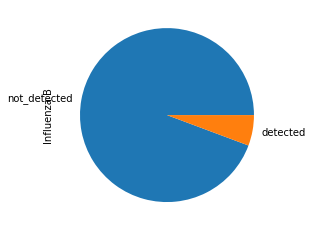

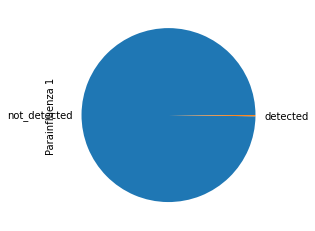

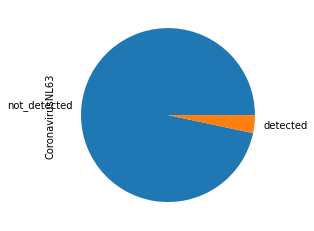

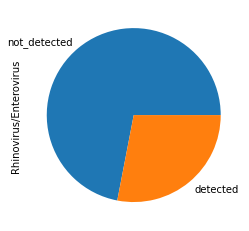

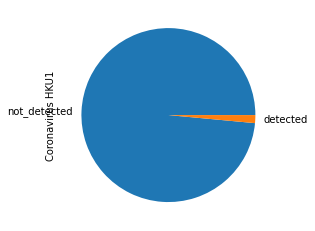

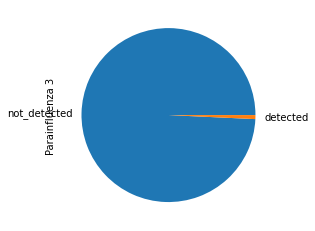

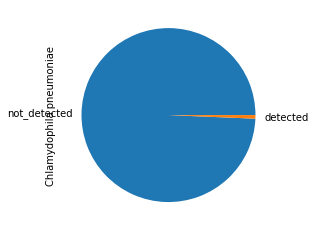

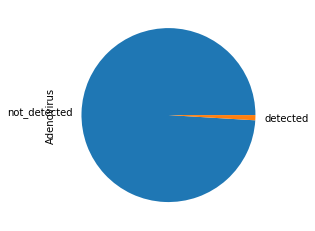

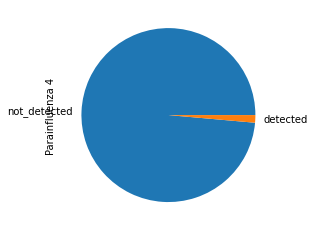

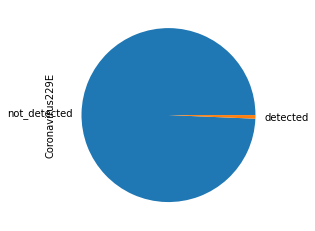

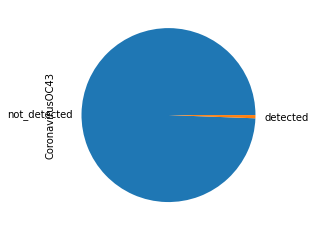

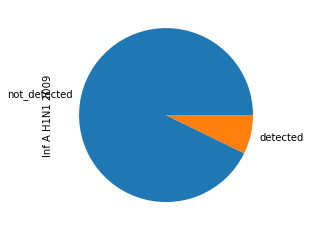

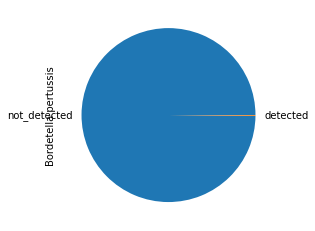

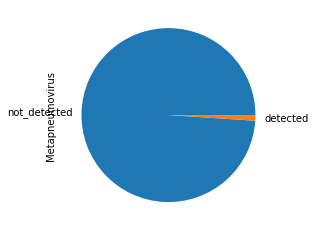

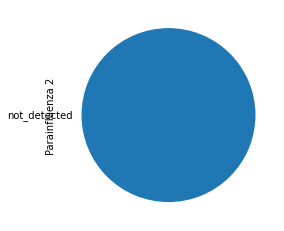

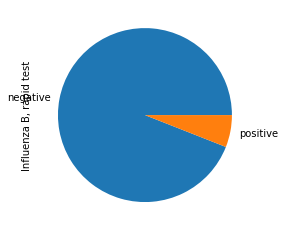

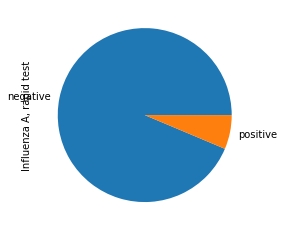

In [22]:
for colo in df.select_dtypes('object'):
  plt.figure()
  df[colo].value_counts().plot.pie()
  

**Relation target/ variables**

Création de sous-ensembles positifs et négatifs selon la variable target

In [23]:
positive_df= df[df['SARS-Cov-2 exam result']== 'positive']
positive_df.head()


,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
67,7,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,16,positive,1,0,0,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
513,10,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
568,2,positive,0,0,0,0.991838,0.792188,-0.341548,1.469188,1.653476,...,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,NaN,NaN
676,15,positive,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
positive_df.shape


(558, 38)

In [25]:
negative_df= df[df['SARS-Cov-2 exam result']== 'negative']
negative_df.shape


(5086, 38)

In [26]:
missing_rate = df.isna().sum()/df.shape[0]
df.isna().sum()/df.shape[0]


Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Hematocrit                                               0.893161
Hemoglobin                                               0.893161
Platelets                                                0.893338
Mean platelet volume                                     0.893870
Red blood Cells                                          0.893338
Lymphocytes                                              0.893338
Mean corpuscular hemoglobin concentration (MCHC)         0.893338
Leukocytes                                               0.893338
Basophils                                                0.893338
Mean corpuscular hemoglobin (MCH)                        0.893338
Eosinophil

création des sous ensembles Blood et Viral selon les valeurs manquantes 

In [ ]:
df.columns[(missing_rate<0.9)&(missing_rate > 0.88)]
df.columns[(missing_rate<0.88)&(missing_rate > 0.75)]

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2', 'Influenza B, rapid test',
       'Influenza A, rapid test'],
      dtype='object')

In [ ]:
blood_columns = df.columns[(missing_rate<0.9)&(missing_rate > 0.88)]
viral_columns = df.columns[(missing_rate<0.88)&(missing_rate > 0.75)]


la relation blood/target

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

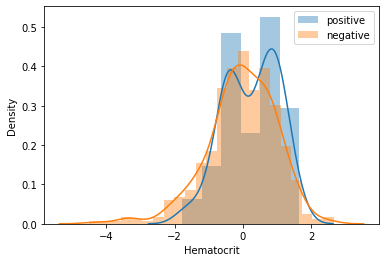

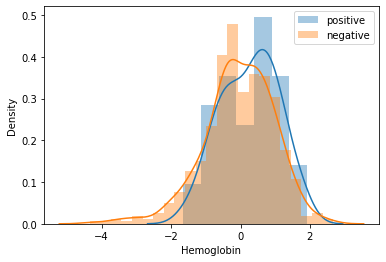

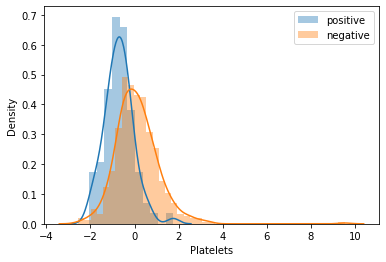

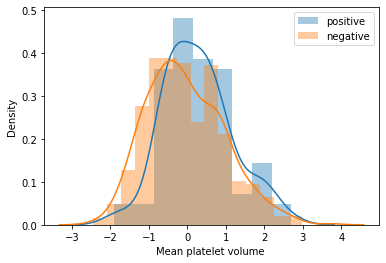

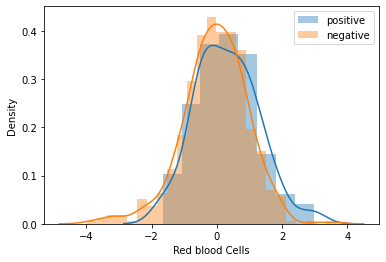

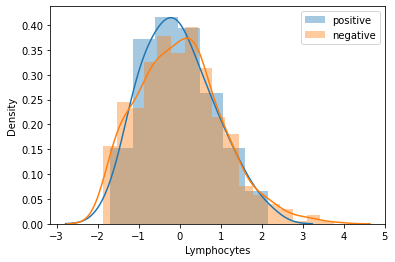

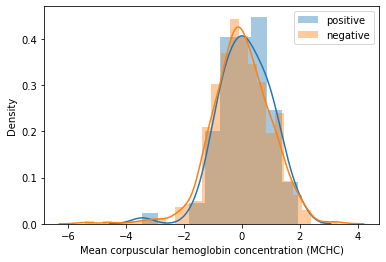

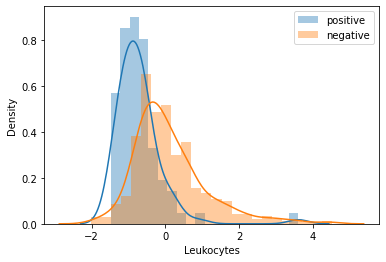

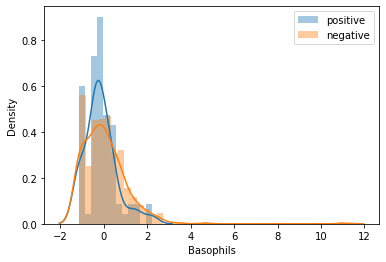

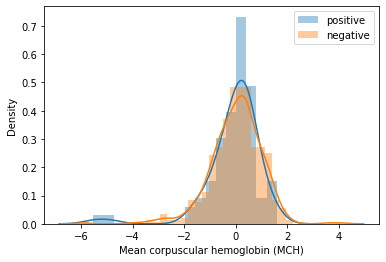

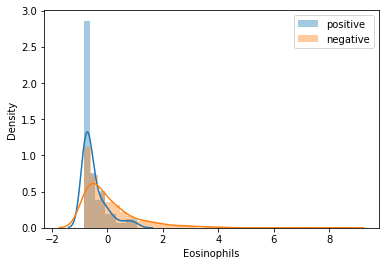

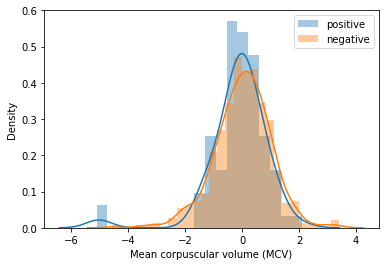

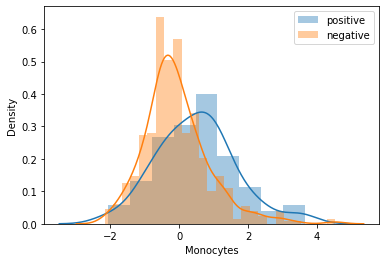

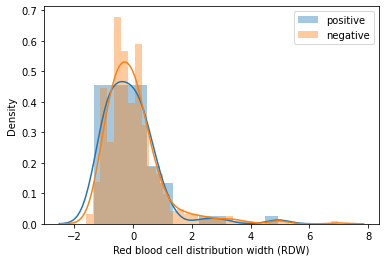

In [ ]:
for col in blood_columns :
  plt.figure()
  sns.distplot(positive_df[col] , label= 'positive')
  sns.distplot(negative_df[col] , label= 'negative')
  plt.legend()


**Relation target/Age**

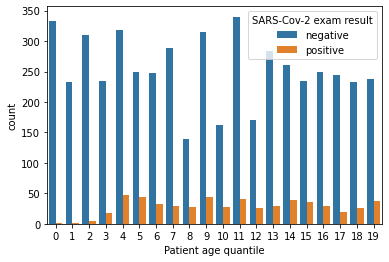

In [ ]:
sns.countplot( x= 'Patient age quantile', hue='SARS-Cov-2 exam result', data= df)

**Relation Target/Viral**

In [ ]:
df.columns[(missing_rate<0.8)&(missing_rate > 0.75)]

Index(['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B',
       'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus',
       'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae',
       'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43',
       'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus',
       'Parainfluenza 2'],
      dtype='object')

on remarque que les variables de cet ensemble sont qualitaive 

In [ ]:
pd.crosstab(df['SARS-Cov-2 exam result'], df['Influenza A'])

Influenza A,detected,not_detected
SARS-Cov-2 exam result,,
negative,18,1224
positive,0,112


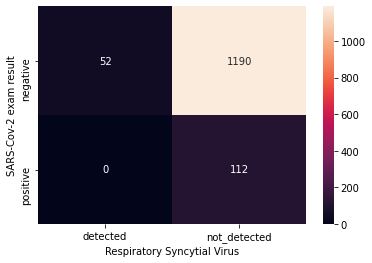

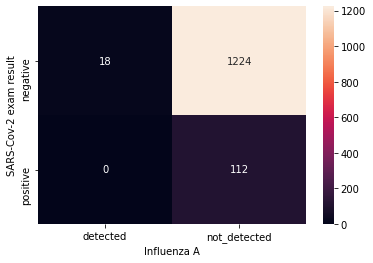

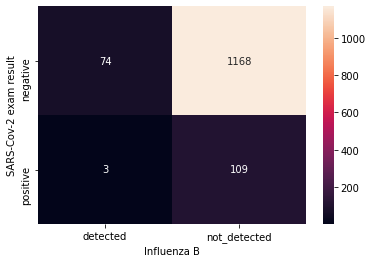

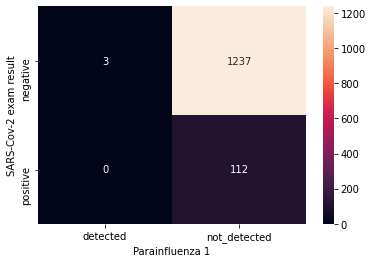

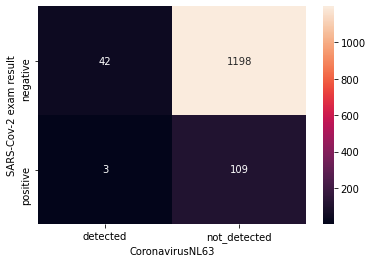

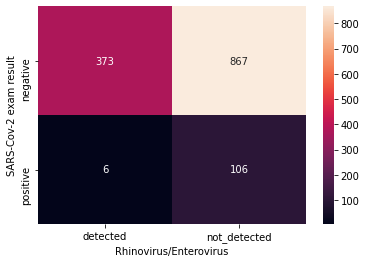

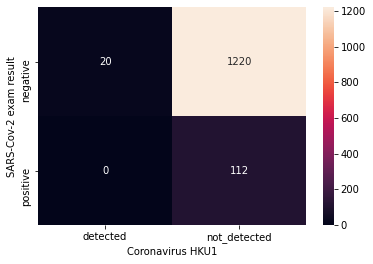

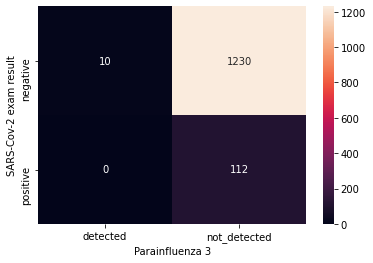

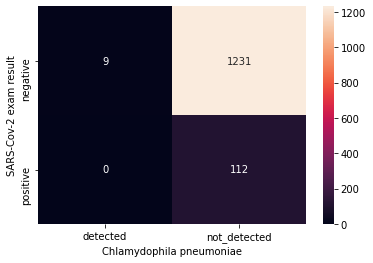

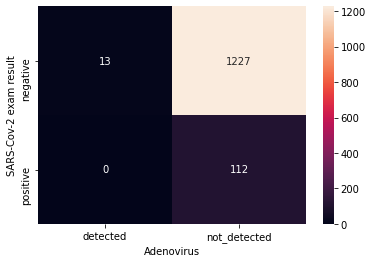

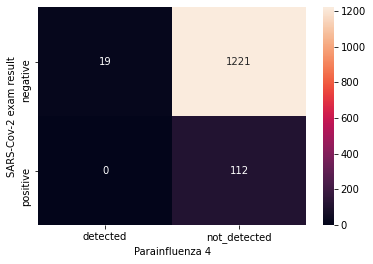

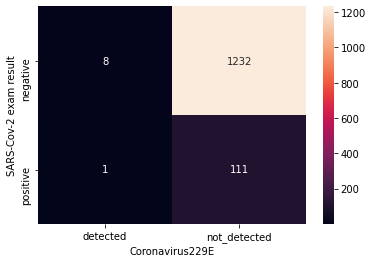

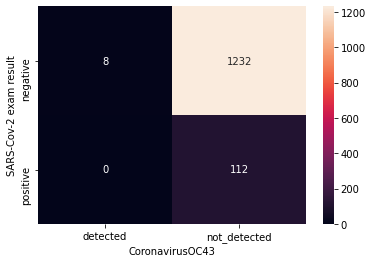

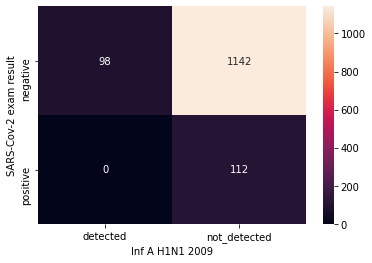

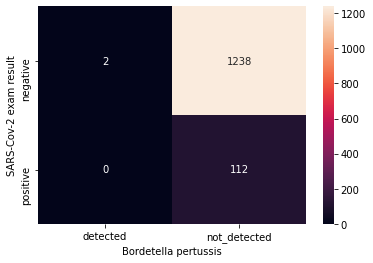

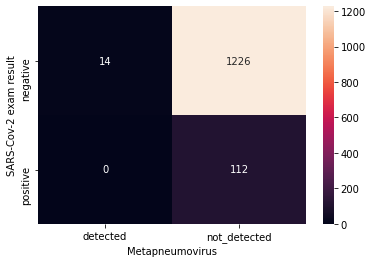

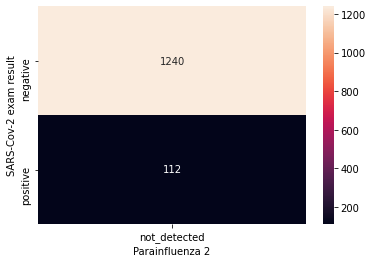

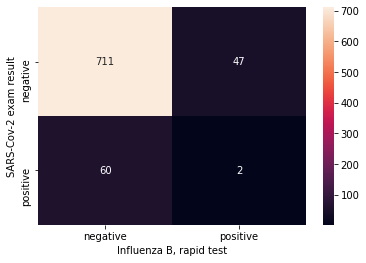

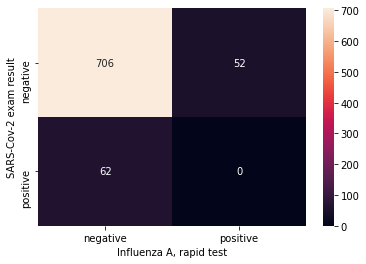

In [ ]:
for col in viral_columns :
  plt.figure()
  sns.heatmap( pd.crosstab(df['SARS-Cov-2 exam result'], df[col]), annot= True , fmt= 'd')

Analyse un peu plus avancée 

Relation Variable/Variable 

Taux sanguin 

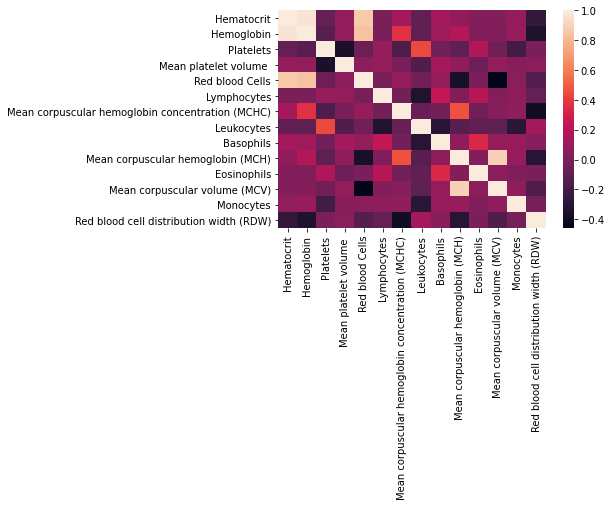

In [ ]:
sns.heatmap(df[blood_columns].corr())


*une autre representation possible avec la fonction suivante* 

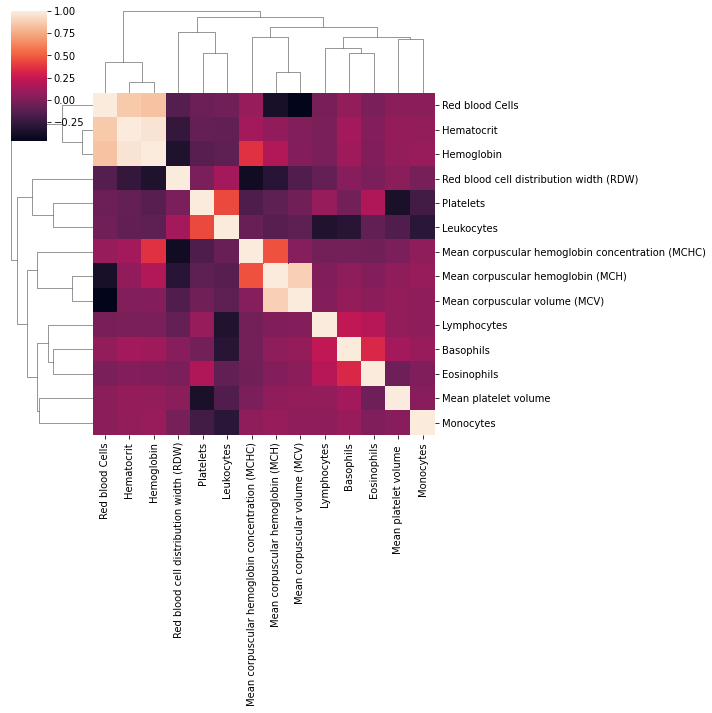

In [ ]:
sns.clustermap(df[blood_columns].corr())

Relation Age / Sang

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this wa

<Figure size 432x288 with 0 Axes>

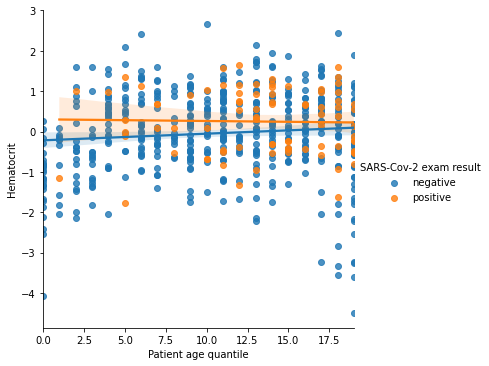

<Figure size 432x288 with 0 Axes>

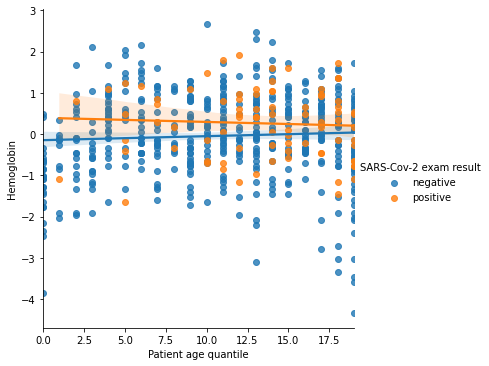

<Figure size 432x288 with 0 Axes>

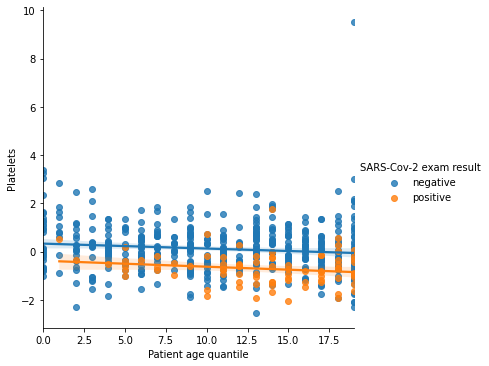

<Figure size 432x288 with 0 Axes>

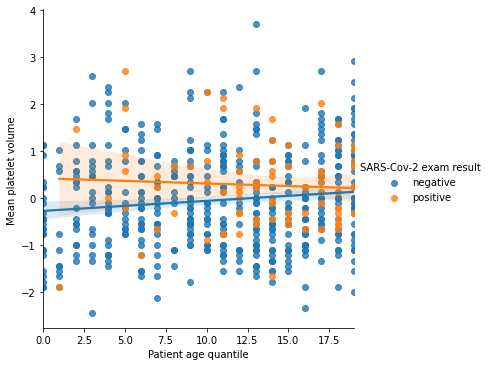

<Figure size 432x288 with 0 Axes>

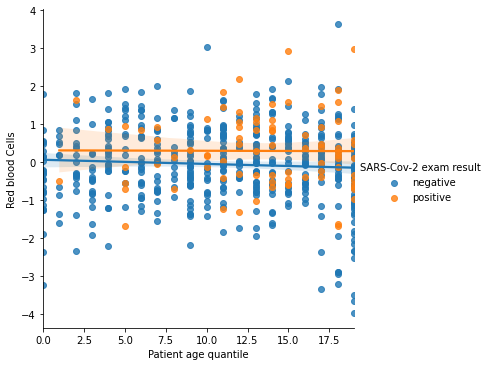

<Figure size 432x288 with 0 Axes>

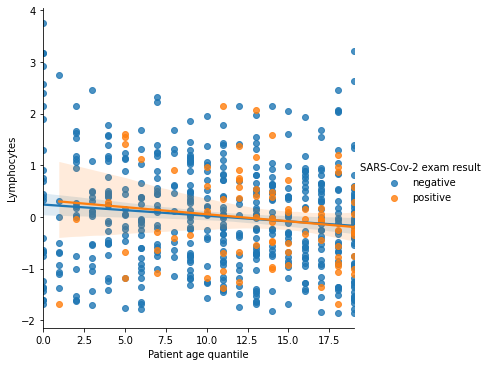

<Figure size 432x288 with 0 Axes>

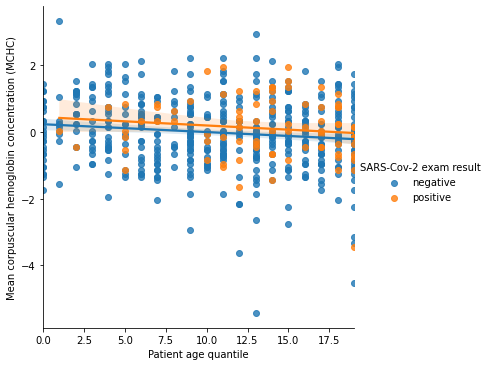

<Figure size 432x288 with 0 Axes>

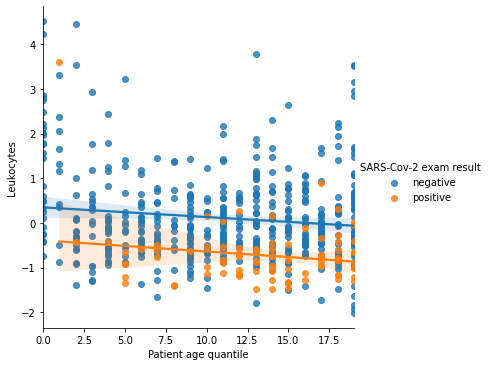

<Figure size 432x288 with 0 Axes>

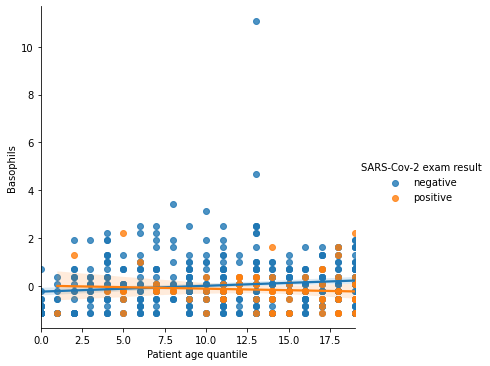

<Figure size 432x288 with 0 Axes>

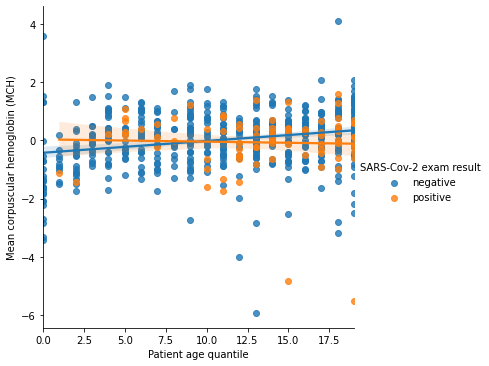

<Figure size 432x288 with 0 Axes>

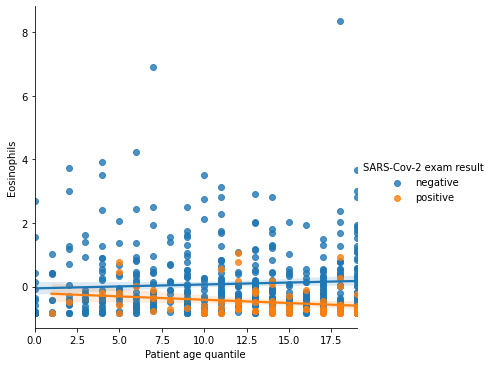

<Figure size 432x288 with 0 Axes>

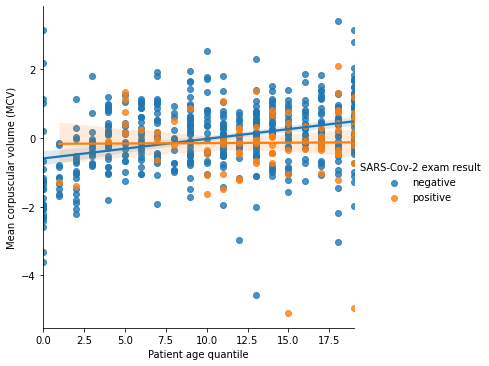

<Figure size 432x288 with 0 Axes>

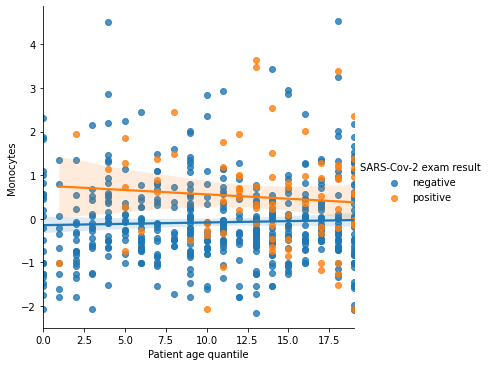

<Figure size 432x288 with 0 Axes>

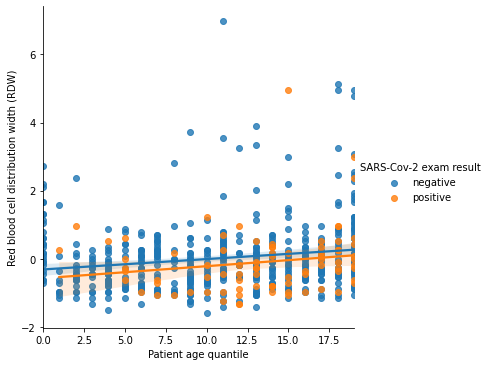

In [ ]:
for col in blood_columns:
  plt.figure()
  sns.lmplot(x= 'Patient age quantile',y = col, hue='SARS-Cov-2 exam result', data= df )

pour bien comprendre la relation entre l'Age et les variables sanguins on utilise la fonction suivante vu que les grapiques précedentes ne sont pas représentative 

In [ ]:
df.corr()['Patient age quantile'].sort_values()


Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu